In [1]:
import numpy as np
import random 
import matplotlib
import math
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
#variables
#N=100 #total number of particles
S=10000#total number of x space
so= 0 #initial position value 
T= 1000000#total time

In [3]:
#functions

# Return the value of the Gaussian probability function with mean mu and standard deviation sigma at the given x value.

def f(x, loc=S/2, scale=(S/2)/3):
    y = sp.stats.norm.pdf(x, loc, scale)
    return y

#2nd f: triangular distribution
def g(k, mode=S/4, left=so, right=S):
    c = (mode - left) / (right - left)
    loc = left
    scale = right - left
    y = sp.stats.triang.pdf(k, c, loc, scale)
    return y

#Boltzman f

def fb(xj1, xjo,j,muo ,alpha):
    mu= muo- alpha * j
    b = math.exp(-abs(xj1-xjo)/mu)
    return b

In [4]:
#comparision function
def shi2(f,g):
    x2 = np.sum((np.array(f)-np.array(g))*(np.array(f)-np.array(g)))
    return x2

In [5]:
#create vectors(nomenclature:vector-function-variable)
vgx=np.arange(so,S)
vgy=g(vgx)
vfx=vgx
vfy=f(vfx)
a = 1000000

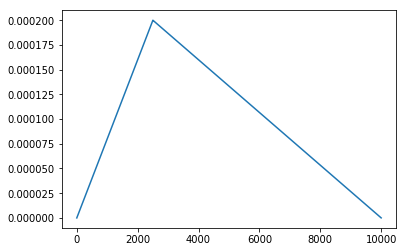

In [6]:
plt.plot(vgx, vgy)
plt.show()

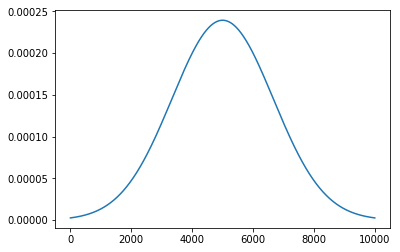

In [7]:
plt.plot(vfx, vfy)
plt.show()

In [8]:
#principal loop
from multiprocessing import Process

def rmc_1d(vgy):
    for i in range(0,T):#for each time
        x20=shi2(vfy,vgy)
        modif_vgy=vgy
        for j in range(so,S):#for each point of the vector in x
            a=random.randrange(-1,2) #generate random number
            modif_vgy[j]=vgy[j]+a
        x21=shi2(vfy,modif_vgy)
        #prob. boltzman
        b=fb(x21, x20,i,1000000.0 ,0.5) #put value of the constants ex: muo=1000 and alpha=0.5 (
        #WARNING!!!!: if time too big and muo small-> we will divide by zero in mu)
        #find a random k
        k = sp.stats.boltzmann.rvs(0.5, 2, size=1)  #Choose number for lamda ex:0.5
        if x21 < x20 :
            vgy=modif_vgy
        elif k < b:
            vgy=modif_vgy
    return vgy

def func_test():
    for i in range(1000000):
        print(i)
    return a
    

rmc_to_cpu = Process(target=rmc_1d(vgy))#process indicate we assing to a specific target
test = Process(target=func_test)#process indicate we assing to a specific target
rmc_to_cpu.start()
test.start()
rmc_to_cpu.join()
test.join()
        

KeyboardInterrupt: 

In [ ]:
plt.plot(vgx, vgy)
plt.show()